<a href="https://colab.research.google.com/github/tomalexsmith/Bitcoin-sentiment-analysis/blob/main/data_visualisation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [ ]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


# Avg weekly sentiment

### Import Bitcoin weekly returns dataset

In [ ]:
weekly_rtrn = '/content/drive/My Drive/BTC_data_weeklyrtrn.csv'

with open(weekly_rtrn, 'r', encoding = 'utf-8') as f:
  weekly_rtrn = pd.read_csv(f)

weekly_rtrn.rename(columns = {'Date':'date'}, inplace = True)
weekly_rtrn['date'] = pd.to_datetime(weekly_rtrn['date'])
weekly_rtrn.set_index('date', inplace=True)
weekly_rtrn.drop(weekly_rtrn.columns[[0,1]], axis=1, inplace=True)
weekly_rtrn['weekly_return'] = weekly_rtrn['weekly_return'] * 100



weekly_rtrn.head()

### Import avg weekly sentiment dataset

In [ ]:
weekly_sent = '/content/drive/My Drive/avgWeeklySentiment.csv'

with open(weekly_sent, 'r', encoding = 'utf-8') as f:
  weekly_sent = pd.read_csv(f)


weekly_sent.rename(columns = {'mdy':'date', 'Sentiment':'sentiment'}, inplace = True)
weekly_sent['date'] = pd.to_datetime(weekly_sent['date'])
weekly_sent.set_index('date', inplace=True)
weekly_sent.drop(weekly_sent.columns[0], axis=1, inplace=True)
weekly_sent['sentiment'] = weekly_sent['sentiment'] * 100

weekly_sent.head(len(weekly_sent))

### Concatenate datasets

In [ ]:
vis_df = pd.merge(weekly_rtrn, weekly_sent, left_index=True, right_index=True)
vis_df.dropna(inplace=True)
vis_df.head()

### Visualise data

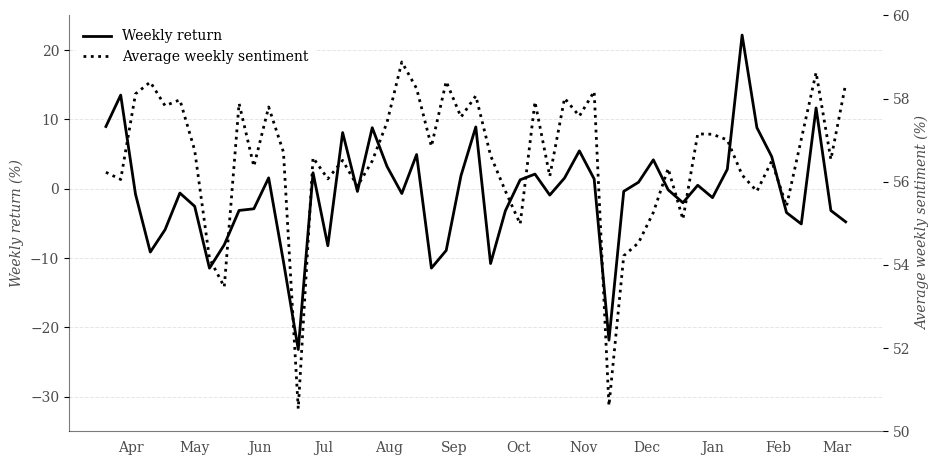

In [ ]:
sns.set_style({'font.family':'serif', 'font.serif':'Times New Roman'})

fig, ax = plt.subplots(1, 1, figsize=(10.5, 5.4))
plt.sca(ax)

sns.lineplot(data=vis_df,
              x=vis_df.index,
              y='weekly_return',
              color='#000000',
              label='Weekly return',
              linewidth=2,
              zorder=2
              )

ax.set(ylim=(-35, 25))

# Remove lower axis borders on the top and right.
ax.spines["top"].set_alpha(0.0)
ax.spines["bottom"].set_alpha(0.3)
ax.spines["right"].set_alpha(0.0)
ax.spines["left"].set_alpha(0.3)

# Remove axis tick lines.
plt.xticks(alpha=0.7)
plt.yticks(alpha=0.7)
ax.tick_params(axis="y", left=False)
ax.tick_params(axis="x", bottom=False)

ax.set_ylabel("Weekly return (%)", fontsize=10, style='italic', alpha=0.7)

ax.xaxis.set_major_locator(mdates.MonthLocator())

ax.xaxis.set_major_formatter(mdates.DateFormatter('%b'))

ax2 = plt.twinx()

    # Plot monthly closing average.
sns.lineplot(data=vis_df,
              x=vis_df.index,
              y='sentiment',
              color='#000000',
              linestyle='dotted',
              label='Average weekly sentiment',
              linewidth=2,
              zorder=3,
              ax=ax2
              )

ax2.set(ylim=(50, 60))

# Add y-axis grid.
ax.grid(axis='y', alpha=.1, linewidth=.7, color='black', linestyle='dashed')

# Remove lower axis borders on the top and right.
ax2.spines["top"].set_alpha(0.0)
ax2.spines["bottom"].set_alpha(0.3)
ax2.spines["right"].set_alpha(0.0)
ax2.spines["left"].set_alpha(0.3)

# Remove axis tick lines.
plt.xticks(alpha=0.7)
plt.yticks(alpha=0.7)
ax2.tick_params(axis="y", left=False)
ax2.tick_params(axis="x", bottom=False)

ax2.set_ylabel("Average weekly sentiment (%)", fontsize=10, style='italic', alpha=0.7)
ax.set_xlabel("")
ax2.set_xlabel("")

ax.legend(loc='upper left', edgecolor='White', facecolor="White", framealpha=1, borderpad=.5)
ax2.legend(loc='upper left', edgecolor='White', facecolor="White", framealpha=1, borderpad=.5, bbox_to_anchor=(0, 0.95))



# Avg weekly sentiment of top 10 daily tweets

### Import Bitcoin weekly returns dataset

In [ ]:
weekly_rtrn = '/content/drive/My Drive/BTC_data_weeklyrtrn.csv'

with open(weekly_rtrn, 'r', encoding = 'utf-8') as f:
  weekly_rtrn = pd.read_csv(f)

weekly_rtrn.rename(columns = {'Date':'date'}, inplace = True)
weekly_rtrn['date'] = pd.to_datetime(weekly_rtrn['date'])
weekly_rtrn.set_index('date', inplace=True)
weekly_rtrn.drop(weekly_rtrn.columns[[0,1]], axis=1, inplace=True)
weekly_rtrn['weekly_return'] = weekly_rtrn['weekly_return'] * 100



weekly_rtrn.head()

,weekly_return
date,
2022-03-13,NaN
2022-03-20,8.978046
2022-03-27,13.510211
2022-04-03,-0.783686
2022-04-10,-9.140083


### Import avg weekly sentiment of top 10 tweets dataset

In [ ]:
weekly_sent = '/content/drive/My Drive/TopAvgWeeklySentiment.csv'

with open(weekly_sent, 'r', encoding = 'utf-8') as f:
  weekly_sent = pd.read_csv(f)


weekly_sent.rename(columns = {'mdy':'date', 'Sentiment':'sentiment'}, inplace = True)
weekly_sent['date'] = pd.to_datetime(weekly_sent['date'])
weekly_sent.set_index('date', inplace=True)
weekly_sent.drop(weekly_sent.columns[0], axis=1, inplace=True)
weekly_sent['sentiment'] = weekly_sent['sentiment'] * 100

weekly_sent.head()

,sentiment
date,
2022-03-13,35.714286
2022-03-20,52.857143
2022-03-27,47.142857
2022-04-03,45.714286
2022-04-10,52.857143


### Concatenate datasets

In [ ]:
vis_df = pd.merge(weekly_rtrn, weekly_sent, left_index=True, right_index=True)
vis_df.dropna(inplace=True)
vis_df.head()

,weekly_return,sentiment
date,,
2022-03-20,8.978046,52.857143
2022-03-27,13.510211,47.142857
2022-04-03,-0.783686,45.714286
2022-04-10,-9.140083,52.857143
2022-04-17,-5.901104,55.714286


### Visualise data

[(30.0, 70.0)]

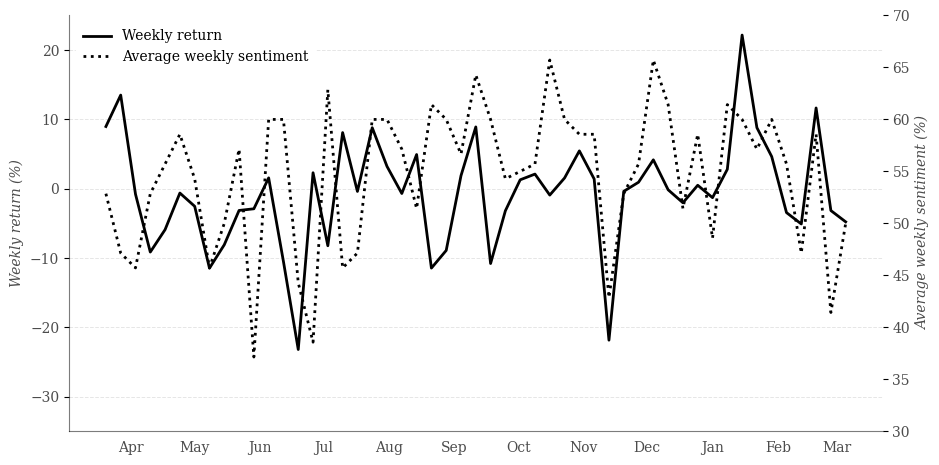

In [ ]:
sns.set_style({'font.family':'serif', 'font.serif':'Times New Roman'})

fig, ax = plt.subplots(1, 1, figsize=(10.5, 5.4))
plt.sca(ax)

sns.lineplot(data=vis_df,
              x=vis_df.index,
              y='weekly_return',
              color='#000000',
              label='Weekly return',
              linewidth=2,
              zorder=2
              )

ax.set(ylim=(-35, 25))

# Remove lower axis borders on the top and right.
ax.spines["top"].set_alpha(0.0)
ax.spines["bottom"].set_alpha(0.3)
ax.spines["right"].set_alpha(0.0)
ax.spines["left"].set_alpha(0.3)

# Remove axis tick lines.
plt.xticks(alpha=0.7)
plt.yticks(alpha=0.7)
ax.tick_params(axis="y", left=False)
ax.tick_params(axis="x", bottom=False)

ax.set_ylabel("Weekly return (%)", fontsize=10, style='italic', alpha=0.7)

ax.xaxis.set_major_locator(mdates.MonthLocator())

ax.xaxis.set_major_formatter(mdates.DateFormatter('%b'))

ax2 = plt.twinx()

    # Plot monthly closing average.
sns.lineplot(data=vis_df,
              x=vis_df.index,
              y='sentiment',
              color='#000000',
              linestyle='dotted',
              label='Average weekly sentiment',
              linewidth=2,
              zorder=3,
              ax=ax2
              )

# Add y-axis grid.
ax.grid(axis='y', alpha=.1, linewidth=.7, color='black', linestyle='dashed')

# Remove lower axis borders on the top and right.
ax2.spines["top"].set_alpha(0.0)
ax2.spines["bottom"].set_alpha(0.3)
ax2.spines["right"].set_alpha(0.0)
ax2.spines["left"].set_alpha(0.3)

# Remove axis tick lines.
plt.xticks(alpha=0.7)
plt.yticks(alpha=0.7)
ax2.tick_params(axis="y", left=False)
ax2.tick_params(axis="x", bottom=False)

ax2.set_ylabel("Average weekly sentiment (%)", fontsize=10, style='italic', alpha=0.7)
ax.set_xlabel("")
ax2.set_xlabel("")

ax.legend(loc='upper left', edgecolor='White', facecolor="White", framealpha=1, borderpad=.5)
ax2.legend(loc='upper left', edgecolor='White', facecolor="White", framealpha=1, borderpad=.5, bbox_to_anchor=(0, 0.95))

ax2.set(ylim=(30, 70))

# Avg daily sentiment

### Import Bitcoin daily returns dataset

In [ ]:
daily_rtrn = '/content/drive/My Drive/BTC_data_dailyrtrn.csv'

with open(daily_rtrn, 'r', encoding = 'utf-8') as f:
  daily_rtrn = pd.read_csv(f)

daily_rtrn.rename(columns = {'Date':'date', 'Daily Return':'daily_return'}, inplace = True)
daily_rtrn.dropna(inplace=True)
daily_rtrn['date'] = pd.to_datetime(daily_rtrn['date'])

daily_rtrn.set_index('date', inplace=True)
daily_rtrn.drop(daily_rtrn.columns[[0]], axis=1, inplace=True)

# daily_rtrn['daily_return'] = daily_rtrn['daily_return'] * 100
daily_rtrn['daily_return'] = daily_rtrn['daily_return'].astype(float)
daily_rtrn['daily_return'] = daily_rtrn['daily_return'].apply(lambda x: round(x, 4))

daily_rtrn.head(len(daily_rtrn))

,daily_return
date,
2022-03-07,-0.9557
2022-03-08,1.7797
2022-03-09,8.3631
2022-03-10,-6.0433
2022-03-11,-1.6354
...,...
2023-03-01,2.1408
2023-03-02,-0.7255
2023-03-03,-4.7449


### Import avg daily sentiment dataset

In [ ]:
daily_sent = '/content/drive/My Drive/avgDailySentiment.csv'

with open(daily_sent, 'r', encoding = 'utf-8') as f:
  daily_sent = pd.read_csv(f)


daily_sent.rename(columns = {'mdy':'date', 'Sentiment':'sentiment'}, inplace = True)
daily_sent['date'] = pd.to_datetime(daily_sent['date'])
daily_sent.set_index('date', inplace=True)
daily_sent.drop(daily_sent.columns[0], axis=1, inplace=True)
daily_sent['sentiment'] = daily_sent['sentiment'] * 100

daily_sent.head(len(daily_sent))

,sentiment
date,
2022-03-07,52.5
2022-03-08,53.3
2022-03-09,55.5
2022-03-10,52.8
2022-03-11,53.0
...,...
2023-03-02,57.3
2023-03-03,56.2
2023-03-04,58.5


### Concatenate datasets

In [ ]:
vis_df = pd.merge(daily_rtrn, daily_sent, left_index=True, right_index=True)
vis_df.dropna(inplace=True)
vis_df.head()

,daily_return,sentiment
date,,
2022-03-07,-0.9557,52.5
2022-03-07,-0.9557,52.5
2022-03-08,1.7797,53.3
2022-03-08,1.7797,53.3
2022-03-09,8.3631,55.5


### Visualise data

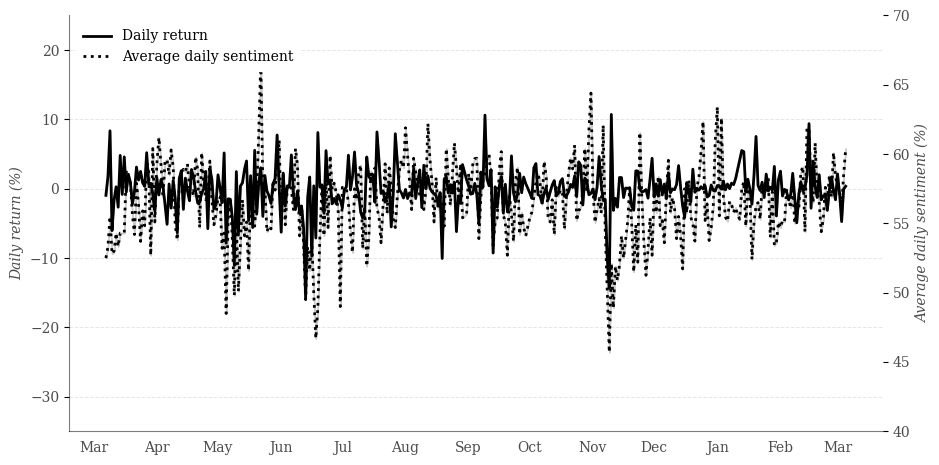

In [ ]:
sns.set_style({'font.family':'serif', 'font.serif':'Times New Roman'})

fig, ax = plt.subplots(1, 1, figsize=(10.5, 5.4))
plt.sca(ax)

sns.lineplot(data=vis_df,
              x=vis_df.index,
              y='daily_return',
              color='#000000',
              label='Daily return',
              linewidth=2,
              zorder=2
              )

ax.set(ylim=(-35, 25))

# Remove lower axis borders on the top and right.
ax.spines["top"].set_alpha(0.0)
ax.spines["bottom"].set_alpha(0.3)
ax.spines["right"].set_alpha(0.0)
ax.spines["left"].set_alpha(0.3)

# Remove axis tick lines.
plt.xticks(alpha=0.7)
plt.yticks(alpha=0.7)
ax.tick_params(axis="y", left=False)
ax.tick_params(axis="x", bottom=False)

ax.set_ylabel("Daily return (%)", fontsize=10, style='italic', alpha=0.7)

ax.xaxis.set_major_locator(mdates.MonthLocator())

ax.xaxis.set_major_formatter(mdates.DateFormatter('%b'))

ax2 = plt.twinx()

    # Plot monthly closing average.
sns.lineplot(data=vis_df,
              x=vis_df.index,
              y='sentiment',
              color='#000000',
              linestyle='dotted',
              label='Average daily sentiment',
              linewidth=2,
              zorder=3,
              ax=ax2
              )

ax2.set(ylim=(40, 70))

# Add y-axis grid.
ax.grid(axis='y', alpha=.1, linewidth=.7, color='black', linestyle='dashed')

# Remove lower axis borders on the top and right.
ax2.spines["top"].set_alpha(0.0)
ax2.spines["bottom"].set_alpha(0.3)
ax2.spines["right"].set_alpha(0.0)
ax2.spines["left"].set_alpha(0.3)

# Remove axis tick lines.
plt.xticks(alpha=0.7)
plt.yticks(alpha=0.7)
ax2.tick_params(axis="y", left=False)
ax2.tick_params(axis="x", bottom=False)

ax2.set_ylabel("Average daily sentiment (%)", fontsize=10, style='italic', alpha=0.7)
ax.set_xlabel("")
ax2.set_xlabel("")

ax.legend(loc='upper left', edgecolor='White', facecolor="White", framealpha=1, borderpad=.5)
ax2.legend(loc='upper left', edgecolor='White', facecolor="White", framealpha=1, borderpad=.5, bbox_to_anchor=(0, 0.95))


# Metric bar chart

### Import metrics

In [ ]:
metrics = '/content/drive/My Drive/comparison_metrics.csv'

with open(metrics, 'r', encoding = 'utf-8') as f:
  metrics = pd.read_csv(f)

metrics.rename(columns={'Unnamed: 0':'Model'}, inplace=True)
metrics.head(len(metrics))

In [ ]:
precision = [0.7804590557, 0.503567099, 0.7005527288]

metrics['Precision'] = precision
metrics.head(len(metrics))

,Model,Accuracy,Recall,F1,Precision
0,LSTM,0.780459,0.780459,0.780459,0.780459
1,Naive Bayes,0.503567,0.503545,0.502732,0.503567
2,VADER,0.700553,0.643237,0.616161,0.700553


In [ ]:
metrics = pd.melt(metrics, id_vars='Model', var_name='Metric')
metrics.head(len(metrics))

,Model,Metric,value
0,LSTM,Accuracy,0.780459
1,Naive Bayes,Accuracy,0.503567
2,VADER,Accuracy,0.700553
3,LSTM,Recall,0.780459
4,Naive Bayes,Recall,0.503545
5,VADER,Recall,0.643237
6,LSTM,F1,0.780459
7,Naive Bayes,F1,0.502732
8,VADER,F1,0.616161
9,LSTM,Precision,0.780459


### Visualise data

Text(0, 0.5, 'Score')

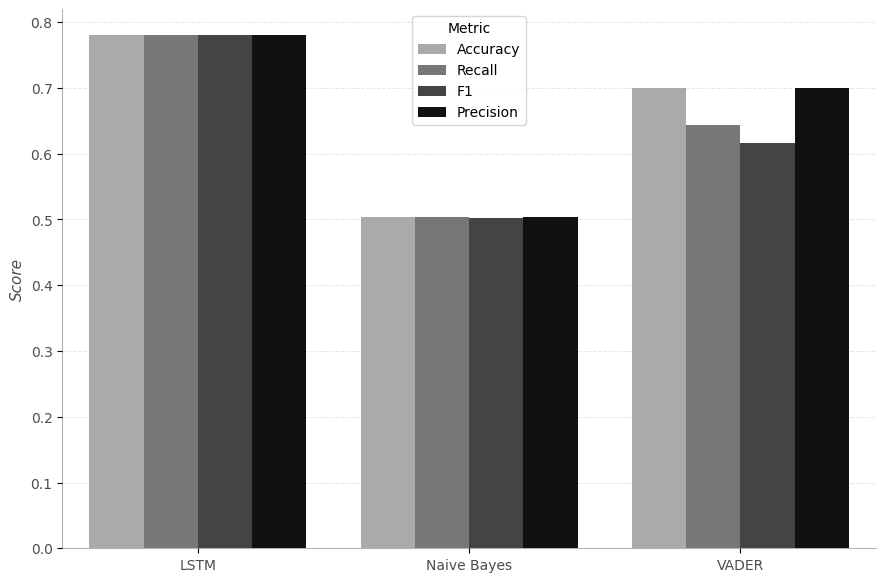

In [ ]:
COLOURS = ["#AAAAAA", "#777777", "#444444", "#111111"]

fig, ax = plt.subplots(1, 1, figsize=(10.5, 7))
plt.sca(ax)

ax.grid(axis='y', alpha=.1, linewidth=.7, color='black', linestyle='dashed', zorder=-5)
sns.barplot(x='Model', y='value', hue='Metric', data=metrics, palette=COLOURS, zorder=10)

plt.gca().spines["top"].set_alpha(0.0)
plt.gca().spines["bottom"].set_alpha(0.3)
plt.gca().spines["right"].set_alpha(0.0)
plt.gca().spines["left"].set_alpha(0.3)

plt.xticks(alpha=0.7)
plt.yticks(alpha=0.7)

plt.xlabel('')
plt.ylabel('Score', fontsize=11, alpha=0.7, style='italic')
